<a href="https://colab.research.google.com/github/trista-paul/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
def mean(l):
  return sum(l)/len(l)
mean(sales)

3052.714285714286

In [0]:
def variance(l):
  varsqr = []
  for value in l:
    varsqr.append((value-mean(l))**2)
  return sum(varsqr)/(len(varsqr)-1)
variance(sales)

214387.90476190473

In [0]:
def stdev(l):
  return variance(l)**(1/2)
stdev(sales)

463.0204150595357

In [0]:
#checking
import statistics
print(statistics.mean(sales))
print(statistics.variance(sales))
print(statistics.stdev(sales))

3052.714285714286
214387.90476190476
463.02041505953576


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

In [0]:
import numpy as np

In [0]:
np.cov(sales, customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
stdev(customers)

17.057326313123664

In [0]:
np.cov(sales, customers)/(stdev(sales)*stdev(customers))

array([[27.14495851,  0.96283398],
       [ 0.96283398,  0.03683925]])

In [0]:
np.corrcoef(sales, customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
                )

In [0]:
df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [0]:
dfnum = df.select_dtypes(include=np.number, exclude=['object'])
#corr coefficient
dfnum.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


In [0]:
#variance-covariance
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

Orthogonal is another word for perpendicular.

(-5, 5)

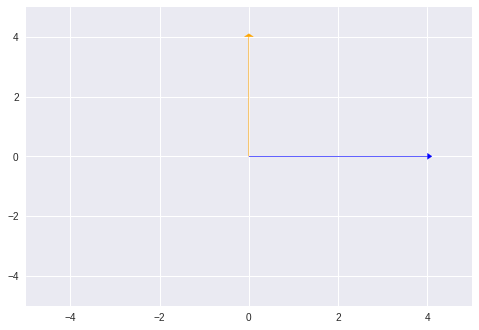

In [0]:
import matplotlib.pyplot as plt
plt.arrow(0,0,0,4,head_width=0.2,head_length=0.1,color='orange')
plt.arrow(0,0,4,0,head_width=0.2,head_length=0.1,color='blue')
plt.xlim(-5,5)
plt.ylim(-5,5)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
#a1b1 + a2b2 + a3b3
(-5 * 6) + (3*-8) + (7*2)

-40

a and b are not orthagonal because their dot product is not equal to zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = [2, -15, 6, 20]
np.linalg.norm(c)**2

665.0

In [0]:
np.dot(c,c)

665

In [0]:
np.matmul(np.transpose(c),c)

665

Norm squared, dot product of a vector with itself, and vector times its transpose refer to the same value.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [0]:
#d unit vectors - [[1],[0]] and [[0],[1]]
# d = 7ihat + 12jhat
#e unit vectors - [[1], [0], [0]] etc

\begin{align}
d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix}+12\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
e = 2\begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix}+11\begin{bmatrix}0\\1\\0\end{bmatrix}
-8\begin{bmatrix}0\\0\\1\end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = [4, 12, 11, 9, 2]
np.divide(f,np.linalg.norm(f))

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

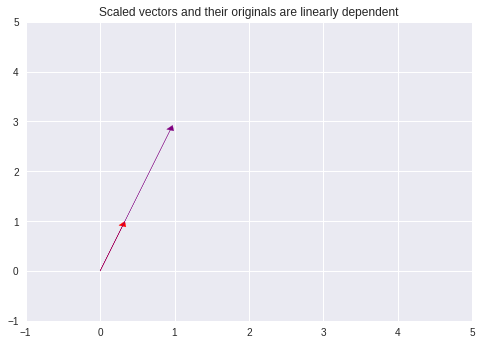

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import math

vec = [0.3, 0.9]
vecpi = np.multiply(math.pi, vec)

plt.arrow(0, 0, vec[0], vec[1], head_width=0.1, head_length=0.1, color='red')
plt.arrow(0, 0, vecpi[0], vecpi[1], head_width=0.1, head_length=0.1, color='purple')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.title('Scaled vectors and their originals are linearly dependent')
plt.show()

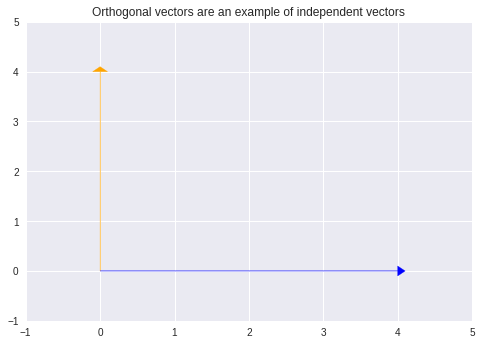

In [0]:
plt.arrow(0,0,0,4,head_width=0.2,head_length=0.1,color='orange')
plt.arrow(0,0,4,0,head_width=0.2,head_length=0.1,color='blue')
plt.title('Orthogonal vectors are an example of independent vectors')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

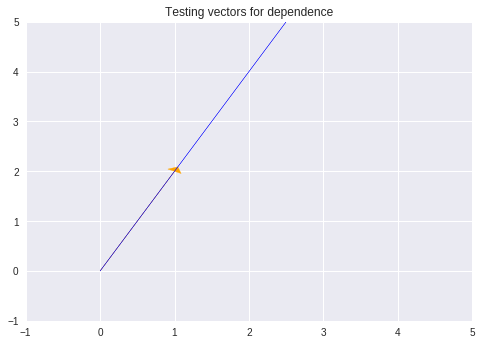

In [4]:
import matplotlib.pyplot as plt
g = [1,2]
h = [4,8]
plt.arrow(0,0,g[0],g[1],head_width=0.2,head_length=0.1,color='orange')
plt.arrow(0,0,h[0],h[1],head_width=0.2,head_length=0.1,color='blue')
plt.title('Testing vectors for dependence')
plt.xlim(-1,5)
plt.ylim(-1,5)
plt.show()

In [5]:
import numpy as np
matrix = [g,h]
np.linalg.matrix_rank(matrix) #used for finding the dimensional space (ex. 2d, 3d)

1

the span of {g,h} is all reals

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [2]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]
import numpy as np
matrix = [l,m,n]
np.linalg.matrix_rank(matrix) #used for finding the dimensional space (ex. 2d, 3d)

3

The span of {l,m,n} is all reals cubed

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



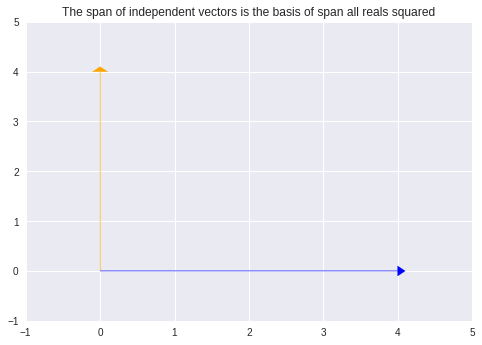

In [0]:
plt.arrow(0,0,0,4,head_width=0.2,head_length=0.1,color='orange')
plt.arrow(0,0,4,0,head_width=0.2,head_length=0.1,color='blue')
plt.title('The span of independent vectors is the basis of span all reals squared')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.show()

## 6.2 What does it mean to form a basis?

The combination of the two independent vectors that make a basis encompass all points of a dimension.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [6]:
P = [[1,2,3],[-1,0,7],[4,8,2]]
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank is the dimensionality of the matrix (ie rank 3 = three dimensional)

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


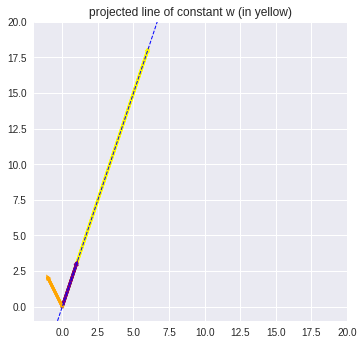

In [22]:
#L = constant*scalar
v = [1,3] #scalar
w = [-1, 2] #constant
proj = np.multiply(6,v)

plt.xlim(-2,20)          
plt.ylim(-1,20)
axes = plt.gca()
plt.axes().set_aspect('equal')
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals #?

plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='purple')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='orange')

plt.title("projected line of constant w (in yellow)")
plt.show()

In [21]:
proj

array([ 6, 18])

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

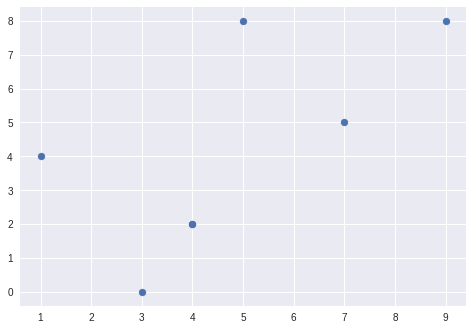

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with - Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()